**Installation of required libraries**

In [1]:
!pip install pyaudio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install SpeechRecognition

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pywhatkit

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 93.5 kB/s eta 0:00:16
                                              0.0/1.5 MB 93.5 kB/s eta 0:00:16
                                              0.0/1.5 MB 93.5 kB/s eta 0:00:16
                                              0.0/1.5 MB 93.5 kB/s eta 0:00:16
                                              0.0/1.5 MB 93.5 kB/s eta 0:00:16
     -                                        0.0/1.5 MB 67.8 kB/s eta 0:00:22
     -                

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Program Files\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Program Files\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Program Files\Python310\lib\ssl.py", line 1273, in recv_

**Recording the audio and converting it into text**

In [4]:
#Importing the libraries for conversion of audio to text
import speech_recognition as sr
import IPython

In [5]:
# Initialize recognizer
r = sr.Recognizer()

# Capture audio from microphone
with sr.Microphone() as source:
    print("Speak something to record the audio...")
    audio = r.listen(source)

# Convert audio to text
try:
    text = r.recognize_google(audio)
    print("You said: " + text)
except sr.UnknownValueError:
    print("Sorry, I could not understand what you said")
except sr.RequestError:
    print("Sorry, my speech service is currently down")

Speak something to record the audio...
You said: I will kill you


In [6]:
#assigning the converted text to a variable
l=text

**Cleaning the dataset**

In [7]:
#importing required libraries for cleaning the dataset(removing nan values,stopwords)
import pandas as pd
import re
import nltk
from tqdm import tqdm
tqdm.pandas()

In [8]:
#downloading the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
#loading the dataset
data = pd.read_csv("Final_dataset.csv",encoding="ISO-8859-1")

In [10]:
STOP_WORDS = nltk.corpus.stopwords.words() + ["br"]

#creating a function for cleanig the sentences in the dataset
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")

    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)

    sentence = " ".join(sentence)
    return sentence

#creating a function for drop nans, then apply 'clean_sentence' function to Recordings
def clean_dataframe(data):
    data = data.dropna(how="any")

    for col in ['Recording']:
        data[col] = data[col].progress_apply(clean_sentence)

    return data

data = clean_dataframe(data)

  0%|          | 0/1219 [00:00<?, ?it/s]

100%|██████████| 1219/1219 [00:00<00:00, 1885.92it/s]
C:\Users\DELL\AppData\Local\Temp\ipykernel_23608\1667123100.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].progress_apply(clean_sentence)


In [11]:
#creating new csv file for the cleaned data
data.to_csv('dataset_clean.csv')

**Loading and encoding the data from the dataset**

In [12]:
#importing the chardet library for encoding the data from the dataset
import chardet
# Detect the encoding of the cleaned data file
with open('dataset_clean.csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']

**Training the data with different ML models**

In [13]:
#importing the required libraries to ready the data for modeling
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [14]:
# Load the data
df = pd.read_csv('dataset_clean.csv',encoding=encoding)
df=df.dropna(how="any")
# Split the data into training and testing sets
X = df['Recording']
y = df['Threat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)
# Convert text to bag-of-words features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

**Logistic regression**

In [15]:
from sklearn.linear_model import LogisticRegression
# Training a logistic regression model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = clf_lr.predict(X_test)

**Decision tree classifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Training a decision tree classifier
clf_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
clf_dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = clf_dt.predict(X_test)

**Random forest classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier
clf_rf = RandomForestClassifier(n_estimators = 100,random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = clf_rf.predict(X_test)

**Naive Bayes classifier**

In [18]:
from sklearn.naive_bayes import MultinomialNB
# Train a Naive Bayes classifier
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = clf_nb.predict(X_test)

**Making the confusion matrix**

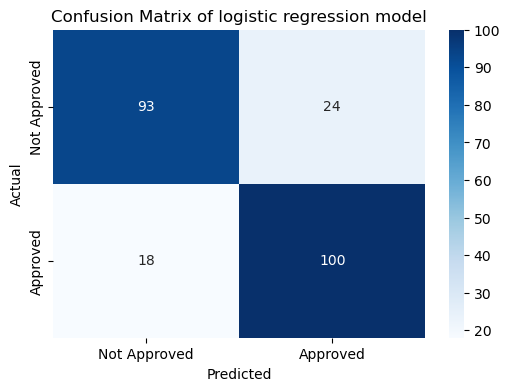

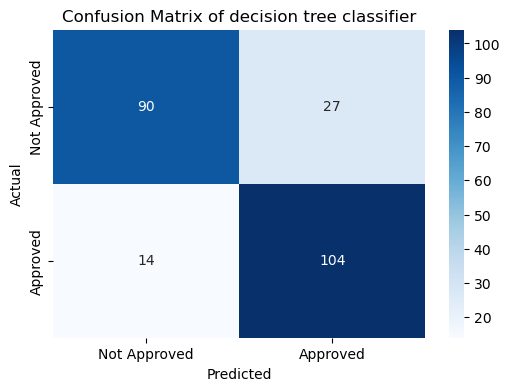

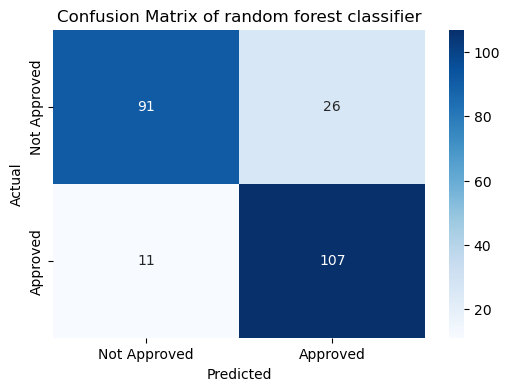

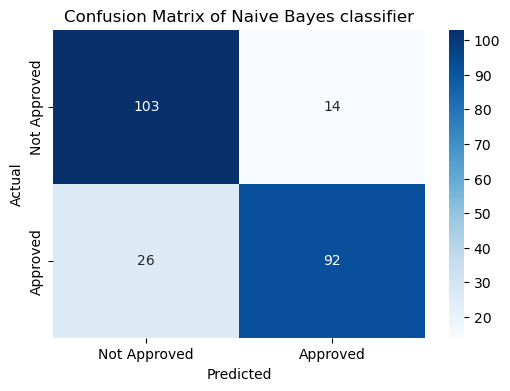

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Making the confusion matrix for logistic regression model
cm_lr= confusion_matrix(y_test, y_pred_lr)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_lr, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of logistic regression model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Making the confusion matrix for decision tree classifier
cm_dt= confusion_matrix(y_test, y_pred_dt)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_dt, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of decision tree classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Making the confusion matrix for random forest classifier
cm_rf= confusion_matrix(y_test, y_pred_rf)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_rf, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of random forest classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Making the confusion matrix for Naive Bayes classifier
cm_nb= confusion_matrix(y_test, y_pred_nb)
# Create a DataFrame to display the confusion matrix
cm_df = pd.DataFrame(cm_nb, index=['Not Approved', 'Approved'], columns=['Not Approved', 'Approved'])
print()
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix of Naive Bayes classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Calculating the accuracy of the trained models**

In [19]:
from sklearn.metrics import accuracy_score

#Calculate accuracy score for logistic regression model
acc_lr= accuracy_score(y_test, y_pred_lr)
print('Accuracy of logistic regression model :', acc_lr*100)

#Calculate accuracy score for decision tree classifier
acc_dt= accuracy_score(y_test, y_pred_dt)
print('Accuracy of decision tree classifier :', acc_dt*100)

#Calculate accuracy score for random forest classifier
acc_rf= accuracy_score(y_test, y_pred_rf)
print('Accuracy of random forest classifier :', acc_rf*100)

#Calculate accuracy score for Naive Bayes classifier
acc_nb= accuracy_score(y_test, y_pred_nb)
print('Accuracy of Naive Bayes classifier :', acc_nb*100)

Accuracy of logistic regression model : 82.12765957446808
Accuracy of decision tree classifier : 82.5531914893617
Accuracy of random forest classifier : 84.25531914893617
Accuracy of Naive Bayes classifier : 82.97872340425532


**Testing the text which was generated by converting the recorded audio**

In [20]:
raw_text =l
raw_text_bow = vectorizer.transform([raw_text])
# Using  the model to predict the output of the raw text
output = clf_lr.predict(raw_text_bow)[0]
print(output)

0.0


**Sending the alert messages through whatsapp using pywhatkit library**

In [ ]:
#importing the required libraries to send the messages
import pywhatkit
import datetime
#storing the numbers to which you want to send the alert
registernumbers=["---numbers to which you want to send the alert---"]

if output==0:
    for j in range(0,len(registernumbers)):
        number=registernumbers[j]
        message = "Threatening call alert"
        pywhatkit.sendwhatmsg(number, message, datetime.datetime.now().hour, datetime.datetime.now().minute + 1)
else:
    print("it's not a threaten call")